In [8]:
from preprocess import preprocess
import seaborn as sns
import matplotlib.pyplot as plt

# df with preprocessed values and graph = true which gives plottable values
df = preprocess(True)

In [22]:
df_model = preprocess()

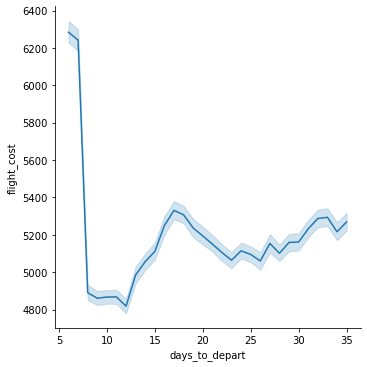

In [2]:
# Plot flight cost vs days to depart
sns.relplot(data=df, x='days_to_depart', y='flight_cost', kind="line")

In [4]:
df

,Air India,AirAsia,Go Air,IndiGo,Spicejet,Vistara,flight_duration,flight_cost,number_of_stops,days_to_depart,...,morning-4,morning-5,morning-6,night-0,night-1,night-2,night-3,night-4,night-5,night-6
0,1,0,0,0,0,0,135.0,4006,0,6,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,135.0,4006,0,6,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,125.0,5056,0,6,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,125.0,4636,0,6,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,125.0,4636,0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29403,0,0,0,1,0,0,780.0,7626,2,35,...,0,0,0,0,0,0,0,0,0,0
29407,0,0,0,1,0,0,850.0,7626,2,35,...,0,0,0,0,0,0,0,0,0,0
29408,0,0,0,1,0,0,985.0,7626,2,35,...,0,0,0,0,0,0,0,0,0,0
29410,0,0,0,1,0,0,725.0,7626,2,35,...,0,0,0,0,0,0,0,0,0,0


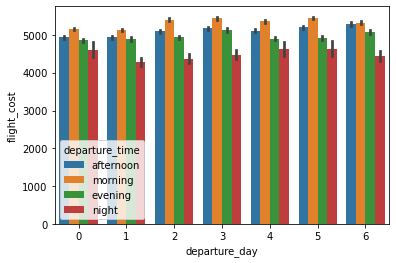

In [7]:
# Plot trends for flight cost vs departure_day and departure time
sns.barplot(data=df, x='departure_day', y='flight_cost', hue='departure_time')

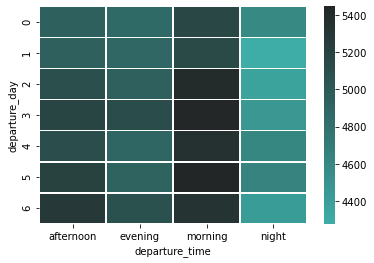

In [8]:
# Visualising flight cost vs departure day and departure time

temp = df.pivot_table(index='departure_day', columns='departure_time', values='flight_cost', aggfunc='mean')
t = sns.dark_palette("#3eada7", reverse=True, as_cmap=True)
sns.heatmap(temp, linewidths=.5, cmap=t)
plt.savefig('dep_day_time_heat.png')

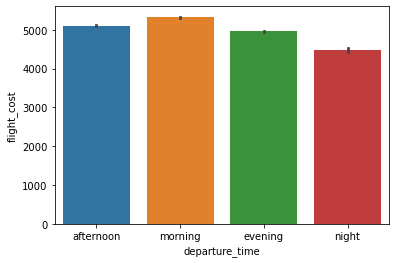

In [9]:
# Plotting flight cost vs departure time

sns.barplot(data=df, x='departure_time', y='flight_cost')

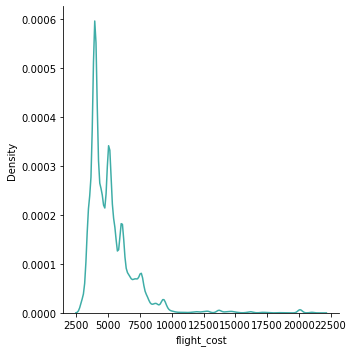

In [36]:
# Density plot for flight cost values

sns.displot(data=df, x='flight_cost', kind='kde', color="#3eada7")
plt.savefig('flight_cost.png')

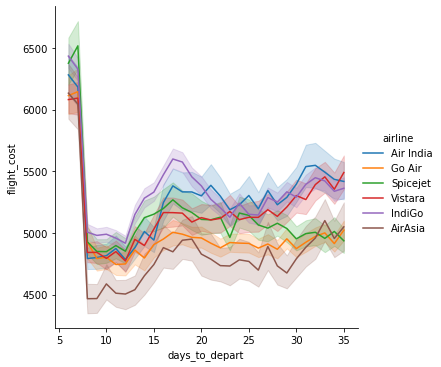

In [12]:
# Mean flight cost vs days to departure for each airline

# temp = df.pivot_table(index='days_to_depart', columns='airline', values='flight_cost', aggfunc='mean')
sns.relplot(data=df, x='days_to_depart', y='flight_cost', kind="line", hue='airline', estimator = 'mean')

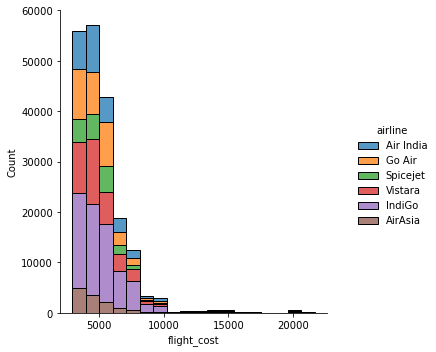

In [13]:
# Flight cost and frequency for each airline

sns.displot(data=df, x="flight_cost", hue="airline", multiple="stack", bins=18)

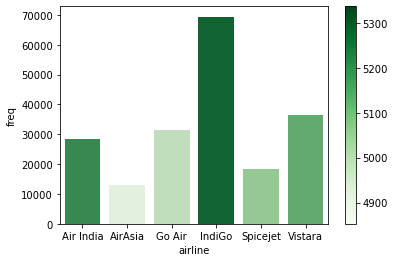

In [11]:
# Plotting airline frequencies and costs

import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
df.sort_values('flight_cost', inplace=True)
g = df.groupby('airline')
costs = g['flight_cost'].mean()
n = g.size()
plot = plt.scatter(n.index, n, c=costs, cmap='Greens')
plt.clf()
plt.colorbar(plot)
ax = sns.barplot(x=n.index, y=n, hue=costs, palette='Greens', dodge=False)
ax.set_ylabel('freq')
ax.legend_.remove()
plt.savefig('hist.png')
# sns.histplot(data=df, x = 'airline', hue=)
# df['cost'] = pd.cut(df['flight_cost'], np.arange(min(df['flight_cost']), max(df['flight_cost']), step=1000))
# sns.histplot(data=df, x= 'airline', hue='flight_cost', hue_norm=Normalize())

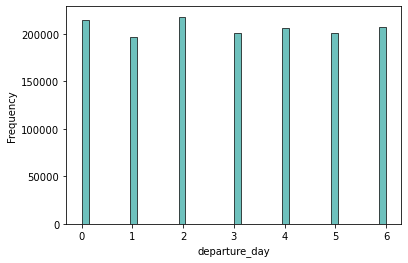

In [12]:
# Plotting Departure day frequencies

sns.histplot(data=df, x = 'departure_day', stat='frequency', color="#3eada7")

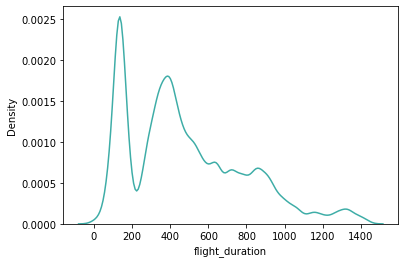

In [13]:
# Plotting flight duration densities

sns.kdeplot(df['flight_duration'], color = "#3eada7")
plt.savefig('duration_kde.png')

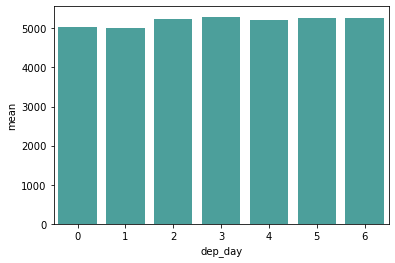

In [14]:
# Plotting mean flight cost for each departure day (Sunday to Saturday)
t = df[['airline', 'flight_path', 'days_to_depart', 'flight_cost', 'number_of_stops', 'departure_day']]
t = t.groupby('departure_day')
x = t.describe()
x = x['flight_cost']
x['dep_day'] = [0,1,2,3,4,5,6]

sns.barplot(data=x, x='dep_day', y='mean', color = '#3eada7')

# sns.displot(t, x="flight_path", shrink=0.8, color='#3eada7')
# plt.xticks(rotation=90)
# plt.savefig('route_count.png')
# # t.corr()
# sns.heatmap(.corr())

In [19]:
from pandas_profiling import ProfileReport
t = df[['airline', 'flight_path', 'departure_day', 'number_of_stops', 'flight_duration', 'days_to_depart', 'flight_cost', ]]
t = t[t['flight_cost']<11000]
prof = ProfileReport(t)
prof.to_file(output_file='report_1.html')

In [16]:
temp = df.loc[:,['flight_path','airline','departure_time_day','booking_day','departure_day','departure_time','flight_cost','number_of_stops']]
temp['flight_path']=temp['flight_path'].astype('category').cat.codes
temp['airline']=temp['airline'].astype('category').cat.codes
temp['departure_time_day']=temp['departure_time_day'].astype('category').cat.codes
temp['departure_time']=temp['departure_time'].astype('category').cat.codes
prof = ProfileReport(temp)
prof.to_file(output_file='output3.html')

In [4]:
df

,Air India,AirAsia,Go Air,IndiGo,Spicejet,Vistara,airline,flight_code,departure_time,flight_duration,...,morning-4,morning-5,morning-6,night-0,night-1,night-2,night-3,night-4,night-5,night-6
981,0,0,1,0,0,0,Go Air,G8-101 | G8-185,morning,210.0,...,0,0,0,0,0,0,0,0,0,0
1180,0,0,1,0,0,0,Go Air,G8-113 | G8-832,morning,860.0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,1,0,0,0,Go Air,G8-101 | G8-185,morning,210.0,...,0,0,0,0,0,0,0,0,0,0
3760,0,0,1,0,0,0,Go Air,G8-141,morning,80.0,...,0,1,0,0,0,0,0,0,0,0
4548,0,0,1,0,0,0,Go Air,G8-371,afternoon,80.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,0,0,0,0,0,1,Vistara,UK-705 | UK-772 | UK-940 | UK-855,morning,240.0,...,1,0,0,0,0,0,0,0,0,0
1046,1,0,0,0,0,0,Air India,AI-502,evening,165.0,...,0,0,0,0,0,0,0,0,0,0
1050,0,1,0,0,0,0,AirAsia,I5-741,afternoon,170.0,...,0,0,0,0,0,0,0,0,0,0
1485,0,0,0,0,0,1,Vistara,UK-812,afternoon,165.0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from preprocess import preprocess
# df_model = preprocess()
# data.to_csv(r'd.csv')
# train, test = train_test_split(data,test_size=0.3)
# model = RandomForestClassifier(n_estimators = 100)
# sel = SelectFromModel(model)
# x_train = train.drop('flight_cost', axis=1)
# y_train = train['flight_cost']
# sel.fit(x_train,y_train)
# x_train.columns[(sel.get_support())]

In [14]:
y = df_model['flight_cost']
X = df_model.loc[:, df_model.columns != 'flight_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [15]:
# Feature Selection using random forest regressor

model = RandomForestRegressor(n_estimators=350)
sel = SelectFromModel(model)
sel.fit(X_train, y_train)
X_train.columns[(sel.get_support())]
# model.fit(X_train, y_train)
# feat_importances = pd.Series(model.feature_importances_, index=df.columns)

Index(['flight_duration', 'number_of_stops', 'days_to_depart',
       'Bengaluru-New Delhi', 'Mumbai-Bengaluru', 'New Delhi-Goa'],
      dtype='object')

In [19]:
# Transform X using features selected from SelectKbest f_regression and k=10

from sklearn.feature_selection import SelectKBest, f_regression
k_best = SelectKBest(f_regression, k=10)
X_new = k_best.fit_transform(X_train, y_train)

array([[  0.,   1., 350., ...,   0.,   0.,   0.],
       [  0.,   1., 670., ...,   0.,   0.,   0.],
       [  0.,   0., 565., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0., 835., ...,   0.,   0.,   0.],
       [  0.,   1., 170., ...,   0.,   0.,   0.],
       [  0.,   1., 345., ...,   1.,   0.,   0.]])

In [23]:
# Train test split data

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
df_model = df_model[df_model['flight_cost']<11000]
y = df_model['flight_cost']
X = df_model.loc[:, df_model.columns != 'flight_cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
# Trianing for KNeighbourRegressor

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors = 12)
neigh.fit(X_train, y_train)
pred = neigh.predict(X_test)
print("Score=", neigh.score(X_test,y_test))
print("MAE",mean_absolute_error(y_test,pred))

Score= 0.4081775823478858
MAE 757.3029997136312


In [30]:
# Grid search for best value of n_neighbours

best_score_k = [-9999999, 10]
best_MAE_k = [99999999, 10]
for i in range(10, 20):
    neigh = KNeighborsRegressor(n_neighbors = i)
    neigh.fit(X_train, y_train)
    pred = neigh.predict(X_test)
    score = neigh.score(X_test,y_test)
    MAE = mean_absolute_error(y_test,pred)
    if (best_score_k[0] < score):
        best_score_k = [score, i]
    if (best_MAE_k[0] > MAE):
        best_MAE_k = [MAE, i]
print("SCORE", best_score_k)
print("MAE", best_MAE_k)

SCORE [0.40997526557196207, 15]
MAE [756.1782513877874, 13]


In [34]:
# Training for MLPRegressor to predict flight cost

from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(100, 100, 20), random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test)
print("SCORE", regr.score(X_test, y_test))
print("MAE", mean_absolute_error(y_test,pred))

SCORE 0.48859674971372635
MAE 692.2498470825896
